## 1. Getting & knowing your data


#### 📌Import Pandas Library
- pandas is a Python library used for data analysis and data manipulation
- pd is an alias (short name) so we don’t have to type pandas again and again

In [2]:
import pandas as pd   

#### 📌Load the Dataset

- pd.read_csv() is used to read a data file

- "data.tsv.txt" → your dataset file

- sep="\t" → tells Python that columns are separated by a tab (TSV format)

- The data is stored inside the variable order_details as a DataFrame

In [3]:
order_details=pd.read_csv(filepath_or_buffer="data.tsv.txt", sep ="\t")
order_details   # Display the Dataset

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 1.1 Perform Initial Analysis

In [8]:
# function ()
# Attribute 

In [9]:
order_details.shape        # To find rows and columns


(4622, 5)

#### 📌 Terminology Reminder

Terminology Alert: 

- Rows     → Observations / Records  
- Columns  → Features / Parameters

#### 📌Check for Missing Values (True/False)

- Returns True if a value is missing

- Returns False if a value is present

- Output is a boolean DataFrame

- Mainly used for inspection, not final result

In [10]:
order_details.isnull()           # to find null values 

,order_id,quantity,item_name,choice_description,item_price
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
...,...,...,...,...,...
4617,False,False,False,False,False
4618,False,False,False,False,False
4619,False,False,False,False,False
4620,False,False,False,False,False


#### 📌Count Missing Values Column-wise

- isnull() → detects missing values

- sum() → counts how many missing values are present

- This is called method chaining

- Gives total null values per column

In [7]:
order_details.isnull().sum()      # to find null values     # chain of function or chain of commands

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

#### 📌Statistical Summary (All Columns)

- Gives complete summary of both:

  - Numerical columns

  - Categorical columns

- Shows:

  - count, mean, std, min, max

  - unique values, most frequent value, etc.

In [8]:
order_details.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


#### 📌Statistical Summary (Only Numerical Columns)

- Displays statistics only for numerical columns

- Useful for understanding:

  - Distribution

  - Range

  - Central tendency

In [9]:
order_details.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


## 1.2 🍽️Find Out the Items Sold in the Restaurant

#### 📌Number of Unique Values Per Column

- Shows how many unique values are present in each column

- Useful to understand:

  - Number of different items

  - Number of different orders

In [10]:
order_details.nunique()

order_id              1834
quantity                 9
item_name               50
choice_description    1043
item_price              78
dtype: int64

#### 📌Access Item Name Column

- Selects only the item_name column

- Output is a Pandas Series

In [11]:
order_details["item_name"]


0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

#### 📌Get Unique Item Names

- Returns an array of all unique food items

- Helps identify what items are sold in the restaurant
  
- Prints the unique item names clearly

- Using print() avoids formatting issues in notebooks

In [12]:
print(order_details["item_name"].unique())      # array will disable 

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Cris

## 1.3 🔥Top 5 Selling Items

- Groups data by item_name

- Adds up (sum) the quantity for each item

- Gives total units sold per food item

In [17]:
order_details.groupby(by="item_name")["quantity"].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


#### 📌Sort Quantities (Ascending Order)

- Sorts item sales from lowest to highest

- Helps identify least sold items

In [20]:
order_details.groupby(by="item_name")["quantity"].sum().sort_values()   #arrange order in ascending

item_name
Carnitas Salad                             1
Veggie Crispy Tacos                        1
Chips and Mild Fresh Tomato Salsa          1
Crispy Tacos                               2
Salad                                      2
Bowl                                       4
Steak Salad                                4
Veggie Salad                               6
Carnitas Salad Bowl                        6
Burrito                                    6
Carnitas Crispy Tacos                      8
Veggie Soft Tacos                          8
Chicken Salad                              9
Barbacoa Salad Bowl                       10
Barbacoa Crispy Tacos                     12
Veggie Salad Bowl                         18
Chips and Roasted Chili-Corn Salsa        18
Izze                                      20
Chips and Roasted Chili Corn Salsa        23
Barbacoa Soft Tacos                       25
Chips and Tomatillo-Red Chili Salsa       25
Nantucket Nectar                          29


#### 📌Sort Quantities (Descending Order)

- Sorts item sales from highest to lowest

- Most useful for finding top selling items

In [21]:
order_details.groupby(by="item_name")["quantity"].sum().sort_values(ascending = False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


#### 📌Top 5 Selling Items

- head() returns first 5 rows

- Gives Top 5 selling food items

- This is a chain of methods:

  - groupby → sum → sort → head

In [26]:
order_details.groupby(by="item_name")["quantity"].sum().sort_values(ascending = False).head()   # chain of method 

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

## 1.3 Give me the list of least 5 selling items 

In [27]:
order_details.groupby(by="item_name")["quantity"].sum().sort_values().head()   # chain of method 

item_name
Carnitas Salad                       1
Veggie Crispy Tacos                  1
Chips and Mild Fresh Tomato Salsa    1
Crispy Tacos                         2
Salad                                2
Name: quantity, dtype: int64

#### 📌Import Visualization Libraries 

- Enables clear charts for quick decision-making

- Industry-standard visualization libraries


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


#### 📌Prepare Data for Visualization

- Extracts Top 5 revenue-driving items

  - What sells the most

  - What drives business growth


In [15]:
top_items = (
    order_details
    .groupby("item_name")["quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)


#### 📊 Visualization 1: Top 5 Selling Items (BAR CHART)

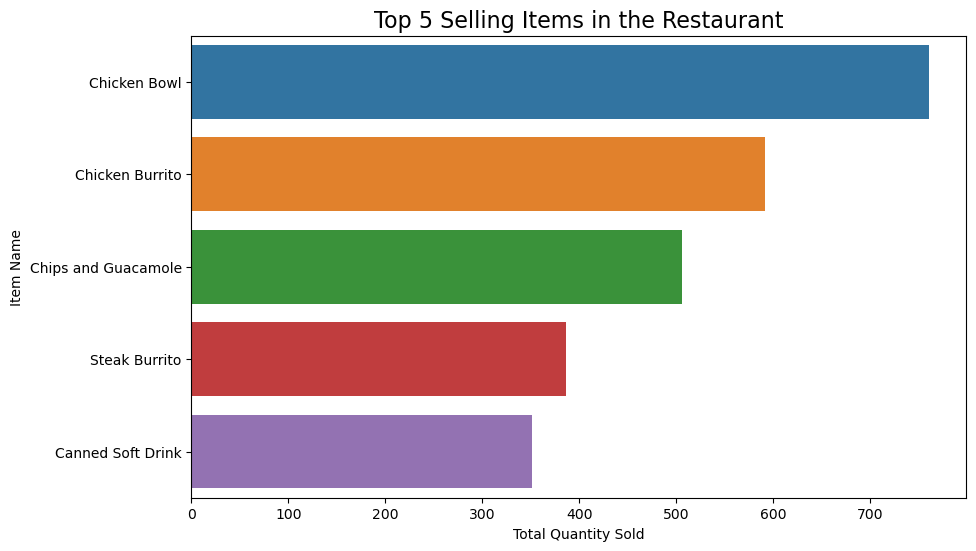

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_items.values, y=top_items.index)

plt.title("Top 5 Selling Items in the Restaurant", fontsize=16)
plt.xlabel("Total Quantity Sold")
plt.ylabel("Item Name")

plt.show()


#### 📊 Visualization 2: Revenue Contribution Share (PIE CHART)

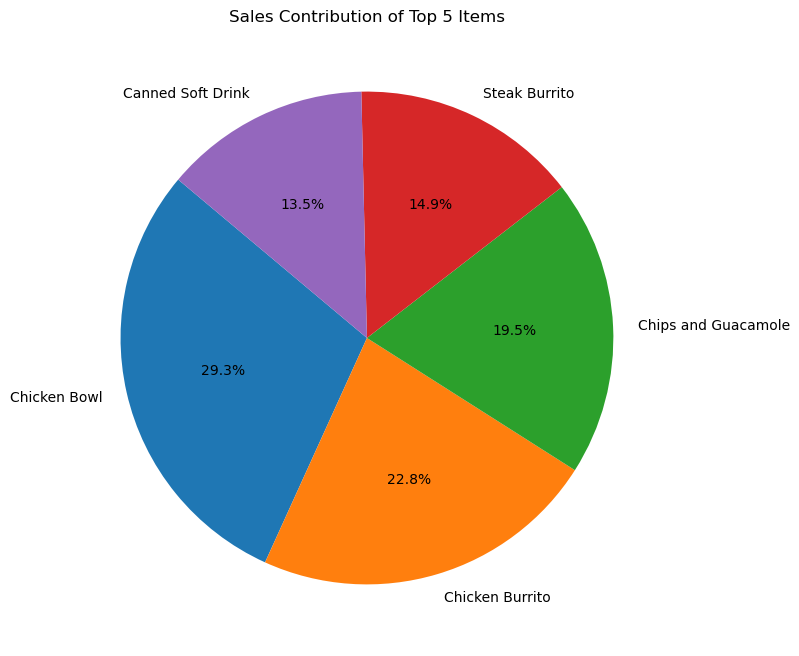

In [17]:
plt.figure(figsize=(8,8))
plt.pie(
    top_items.values,
    labels=top_items.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Sales Contribution of Top 5 Items")
plt.show()


#### 📊 Visualization 3: Least Selling Items (Cost Control)

In [18]:
least_items = (
    order_details
    .groupby("item_name")["quantity"]
    .sum()
    .sort_values()
    .head(5)
)


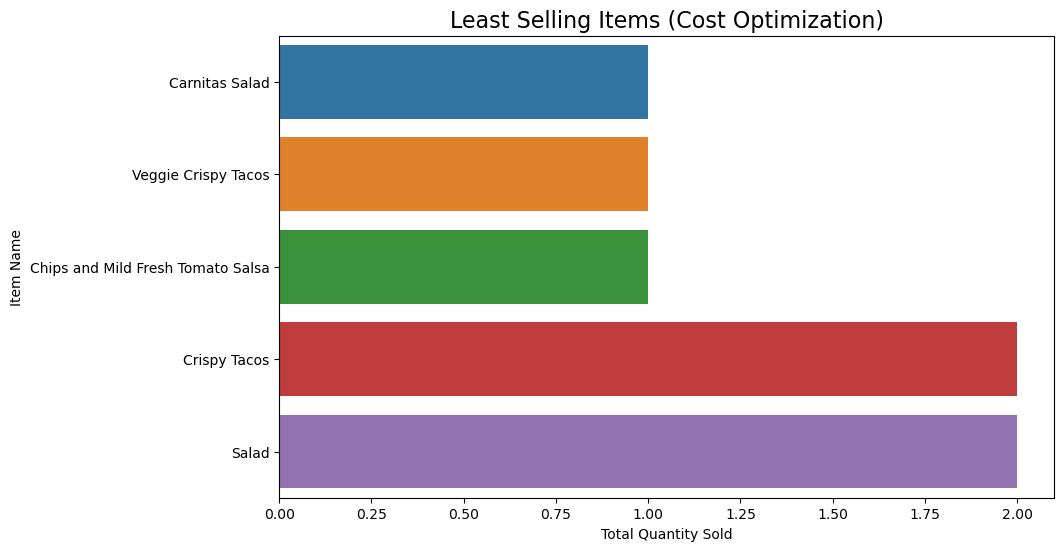

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=least_items.values, y=least_items.index)

plt.title("Least Selling Items (Cost Optimization)", fontsize=16)
plt.xlabel("Total Quantity Sold")
plt.ylabel("Item Name")

plt.show()


#### 📊 Visualization 4: Sales Distribution (Executive Summary)

####  📌 Histogram of Quantity Sold

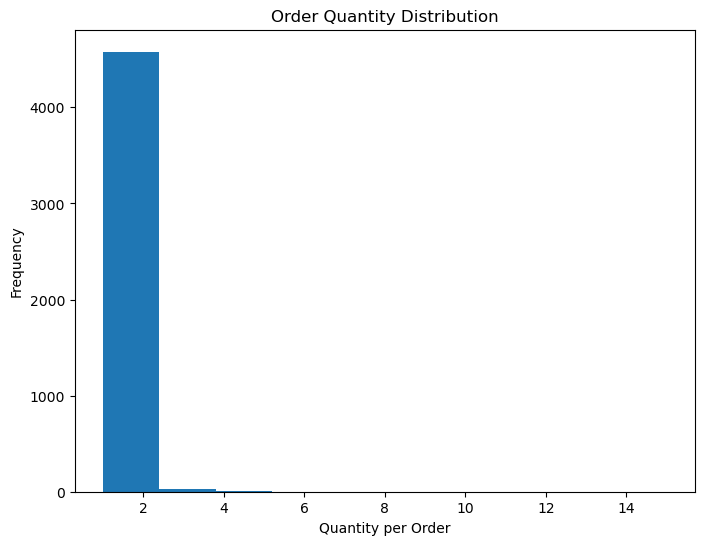

In [20]:
plt.figure(figsize=(8,6))
plt.hist(order_details["quantity"], bins=10)

plt.title("Order Quantity Distribution")
plt.xlabel("Quantity per Order")
plt.ylabel("Frequency")

plt.show()


## 📘 Chapter 2: Data Cleaning

### 📌 View the Dataset
- Displays the complete dataset to understand its structure and content.


In [4]:
order_details


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 📌Check Data Types of Each Column

- Shows the data type (int, float, object, etc.) of every column.
- Helps identify columns that need cleaning or type conversion.

In [5]:
order_details.dtypes


order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

### 📌Inspect item_price Column
- Displays the item_price column to check how prices are stored.
- Here, prices include the $ symbol, so they are treated as strings.

In [6]:
order_details["item_price"]


0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

### 📌Remove $ Symbol (Not Saved)

- Removes the $ symbol from price values

- Data is still of type string (object)

- This step does not modify the original DataFrame

In [7]:
order_details["item_price"].str.replace("$", "")


0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

### 📌Remove $ and Convert to Float (Method Chaining)

- Removes $ symbol

- Converts values to numeric (float)

- Demonstrates method chaining

In [8]:
order_details["item_price"].str.replace("$", "").astype(float)


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

### 📌Update item_price Column Permanently

- Cleans and updates the item_price column permanently so it can be used for calculations.

In [9]:
order_details["item_price"] = order_details["item_price"].str.replace("$", "").astype(float)


### 📌Verify Cleaned Dataset
- Confirms that item_price is now numeric and clean.
  

In [10]:
order_details


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### ✅ Task (After Data Cleaning)

1. find out the top 5 indivial revenue it made
2. Total revenue of top 5 item sold 

### 📌Create Revenue Column

1. find out the top 5 indivial revenue it made
  - Revenue is calculated using:
  - Revenue = Quantity × Item Price


In [11]:
order_details["revenue"] = order_details["quantity"] * order_details["item_price"]


### 📌Top 5 Individual Revenue-Generating Items

- Groups data by item

- Calculates total revenue per item

- Displays top 5 items generating highest revenue

In [12]:
top_5_revenue_items = (
    order_details
    .groupby("item_name")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_5_revenue_items


item_name
Chicken Bowl           8044.63
Chicken Burrito        6387.06
Steak Burrito          4236.13
Steak Bowl             2479.81
Chips and Guacamole    2475.62
Name: revenue, dtype: float64

### 📌Total Revenue of Top 5 Items
- Adds revenue of the top 5 items to find their combined contribution.

In [13]:
total_revenue_top_5 = top_5_revenue_items.sum()
total_revenue_top_5


23623.25

## 📘 Chapter 3: Pandas Data Structures

🔹 Pandas Data Structures

  - 1D → Series

  - 2D → DataFrame

### ✅ Task 1: Create a Meaningful Pandas Series

- Represents daily sales revenue

- Index gives meaningful labels

- This is a 1D data structure

### 📌 Pandas Series Example

In [14]:
daily_sales = pd.Series(
    [1200, 1500, 1100, 1800, 1600],
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
)

daily_sales


Monday       1200
Tuesday      1500
Wednesday    1100
Thursday     1800
Friday       1600
dtype: int64

## ✅ Task 2: Create a Meaningful Pandas DataFrame

- Created using a dictionary

- Rows → Orders (observations)

- Columns → Features

- This is a 2D DataFrame

In [15]:
restaurant_data = pd.DataFrame({
    "Order_ID": [101, 102, 103, 104, 105],
    "Item_Name": ["Burger", "Pizza", "Pasta", "Fries", "Sandwich"],
    "Category": ["Fast Food", "Fast Food", "Italian", "Fast Food", "Fast Food"],
    "Quantity": [2, 1, 3, 2, 1],
    "Item_Price": [120.0, 250.0, 180.0, 90.0, 150.0],
    "Payment_Mode": ["Cash", "Card", "UPI", "UPI", "Card"]
})

restaurant_data


,Order_ID,Item_Name,Category,Quantity,Item_Price,Payment_Mode
0,101,Burger,Fast Food,2,120.0,Cash
1,102,Pizza,Fast Food,1,250.0,Card
2,103,Pasta,Italian,3,180.0,UPI
3,104,Fries,Fast Food,2,90.0,UPI
4,105,Sandwich,Fast Food,1,150.0,Card


## 📘 Chapter 4 – Filtering, Selection & Sorting (Euro 2012)

## 📌Load the Dataset

- Reads the CSV file into a Pandas DataFrame

- Stores the data in euro_2012_data

In [3]:
euro_2012_data = pd.read_csv("Euro_2012_stats_TEAM.csv")


## 📌Display the Dataset
- Displays the entire dataset

- Helps verify data is loaded correctly

In [4]:
euro_2012_data


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


## 📌View Column Names

- Displays all column names

- Helps identify required features for analysis

In [5]:
euro_2012_data.columns


Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

## 📌Select Required Columns

- Selects only important columns

- Reduces unnecessary data for focused analysis

In [6]:
filtered_euro_data = euro_2012_data[["Team", "Goals", "Yellow Cards", "Red Cards"]]
filtered_euro_data

,Team,Goals,Yellow Cards,Red Cards
0,Croatia,4,9,0
1,Czech Republic,4,7,0
2,Denmark,4,4,0
3,England,5,5,0
4,France,3,6,0
5,Germany,10,4,0
6,Greece,5,9,1
7,Italy,6,16,0
8,Netherlands,2,5,0
9,Poland,2,7,1


## 📌Sort Teams by Yellow Cards (Descending)

- Sorts teams by Yellow Cards

- Highest card-receiving teams appear first

In [7]:
filtered_euro_data.sort_values(by="Yellow Cards", ascending=False)


,Team,Goals,Yellow Cards,Red Cards
7,Italy,6,16,0
10,Portugal,6,12,0
13,Spain,12,11,0
0,Croatia,4,9,0
6,Greece,5,9,1
1,Czech Republic,4,7,0
9,Poland,2,7,1
14,Sweden,5,7,0
4,France,3,6,0
11,Republic of Ireland,1,6,1


## 📌Top 5 Teams with Most Yellow Cards

- Shows top 5 teams with highest yellow cards

- Useful to identify undisciplined teams

In [8]:
filtered_euro_data.sort_values(by="Yellow Cards", ascending=False).head()


,Team,Goals,Yellow Cards,Red Cards
7,Italy,6,16,0
10,Portugal,6,12,0
13,Spain,12,11,0
0,Croatia,4,9,0
6,Greece,5,9,1


## 📌Bottom 5 Teams with Least Yellow Cards

- Displays teams with lowest yellow cards

- Useful for fair-play analysis

In [9]:
filtered_euro_data.sort_values(by="Yellow Cards", ascending=False).tail()


,Team,Goals,Yellow Cards,Red Cards
3,England,5,5,0
8,Netherlands,2,5,0
15,Ukraine,2,5,0
2,Denmark,4,4,0
5,Germany,10,4,0


## 📌Check Teams with Red Cards (Boolean)

- Returns True or False

- Identifies teams that received at least one red card

In [10]:
filtered_euro_data["Red Cards"] == 1


0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9      True
10    False
11     True
12    False
13    False
14    False
15    False
Name: Red Cards, dtype: bool

## 📌List Teams That Got Red Cards

- Filters teams with red cards

- Displays only teams meeting the condition

In [11]:
filtered_euro_data[filtered_euro_data["Red Cards"] == 1]


,Team,Goals,Yellow Cards,Red Cards
6,Greece,5,9,1
9,Poland,2,7,1
11,Republic of Ireland,1,6,1


## 📌Check Teams with Yellow Cards ≥ 8

- Returns boolean values

- Checks which teams received 8 or more yellow cards

In [12]:
filtered_euro_data["Yellow Cards"] >= 8


0      True
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9     False
10     True
11    False
12    False
13     True
14    False
15    False
Name: Yellow Cards, dtype: bool

## 📌List Teams with More Than 8 Yellow Cards

- Displays teams with high disciplinary issues

- Useful for behavior analysis

In [13]:
filtered_euro_data[filtered_euro_data["Yellow Cards"] >= 8]


,Team,Goals,Yellow Cards,Red Cards
0,Croatia,4,9,0
6,Greece,5,9,1
7,Italy,6,16,0
10,Portugal,6,12,0
13,Spain,12,11,0
